In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import csv



In [179]:
# logistic regression

def Hw(w,x):
    return 1/(1+np.exp(-sum(np.transpose(w)*x)))

def J(m,W,X,Y):
    su=0
    
    for i in range(1,m+1):
        su+=(1/m)*(-Y[i-1]*np.log(Hw(W,X[i-1]))-(1-Y[i-1])*np.log(1-Hw(W,X[i-1])))    
    return su
                
def GradeJ(m,W,X,Y):
    GJ=[]
    n=len(X[0])
    for j in range(n):
        gj=0
        for i in range(1,m+1):
            gj+=(1/m)*(Hw(W,X[i-1])-Y[i-1])*X[i-1][j]
        GJ.append(gj)
        
    return GJ

def Linear_LogRegr(m,alpha,X,Y,X1,X2):
    
    W=np.zeros(len(X[0]))   # initialize weights
    loss_fu=[]
    K=[]
    epoch=1000
    
    for k in range(epoch):
        
        for j in range(len(X[0])):
            w=W[j]-alpha*GradeJ(m,W,X,Y)[j]
            W[j]=w
        
        #print("No. of iteration: ",k)
        #print(W)
        
        K.append(k)
        loss_fu.append(J(m,W,X,Y))
        
        from numpy import linalg
        
        if np.linalg.norm(W)<=0.001:         # stopping condition
            print("The final weights are: ",W)
            break
    
    plt.subplot(1, 2, 1)
    plt.plot(K,loss_fu)
    plt.title('Loss Function v/s iteration')
    
    plt.subplot(1, 2, 2)
    s=lambda r:(-W[0]-W[1]*r)/(W[2])
    S=s(X1)
    plt.plot(X1,S)
    plt.scatter(X1[Y==0], X2[Y==0], s=6, c='r')
    plt.scatter(X1[Y==1], X2[Y==1], s=6, c='b')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Decision Boundary')
    
    plt.show()

    
    return W


            

In [180]:
#(a) Plot the decision boundary using the developed logistic regression code
# splitting the data in 70/30 and plotting the decision boundary

df=pd.read_csv('Lab13_P2.csv')

train_data = df.sample(frac=0.7, random_state=25) 
test_data = df.drop(train_data.index)

train_data=train_data.reset_index(drop=True)  # resetting the index


test_data=test_data.reset_index(drop=True)   # resetting the index

X1 = train_data.iloc[:, 0]
X2= train_data.iloc[:, 1]
Y= train_data.iloc[:, 2]

X0=np.ones(len(X1))
X=list(zip(X0,X1,X2))
m=len(Y)
W=np.zeros(len(X[0]))
alpha=1




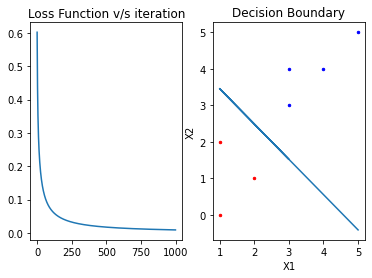

Final weights are:  [-11.59452601   2.53479075   2.62391326]


In [181]:
W_f=Linear_LogRegr(m,alpha,X,Y,X1,X2)
print("Final weights are: ",W_f)

In [182]:
X1 = test_data.iloc[:, 0]
X2= test_data.iloc[:, 1]
True_label= test_data.iloc[:, 2]

X0=np.ones(len(X1))
X=list(zip(X0,X1,X2))

pred_label=[]

# find the predicted label
for i in range(len(X)):
    if sum(W_f*X[i])<0:
        pred_label.append(0)
    else:
        pred_label.append(1)

print("The true labels:       ",True_label)        
print("The predicted labels:  ",pred_label)

The true labels:        0    1
1    0
2    0
Name: label, dtype: int64
The predicted labels:   [0, 0, 0]


In [183]:
# confusion matrix function

def Confusion_Matrix(True_label,pred_label):

    # True positive(TP)

    TP=0
    for i in range(len(True_label)):
        if True_label[i]==pred_label[i] and True_label[i]==1 :
            TP+=1
    print("True positive:  ",TP)


    # True negtive(TN)
    TN=0
    for i in range(len(True_label)):
        if True_label[i]==pred_label[i] and True_label[i]==0 :
            TN+=1
    print("True negative:  ",TN)

    # Flase positive(FP)
    FP=0
    for i in range(len(True_label)):
        if True_label[i]!=pred_label[i] and True_label[i]==0 :
            FP+=1
    print("Flase positive:  ",FP)

    # Flase negative(FN)
    FN=0
    for i in range(len(True_label)):
        if True_label[i]!=pred_label[i] and True_label[i]==1 :
            FN+=1
    print("Flase negative:  ",FN)
    
    return [TP,TN,FP,FN]

In [184]:
# finding confusion matrix for our data

CM=Confusion_Matrix(True_label,pred_label)

True positive:   0
True negative:   2
Flase positive:   0
Flase negative:   1


In [185]:
# defining evaluation matrix

def Evaluation_metric(TP,TN,FP,FN):
    
    # find the accuracy metric
    accuracy = (TP + TN)/(TP + FP + TN + FN)
    print("accuracy:  ",accuracy*100)
    
    # recall metric
    recall=TP/(TP+FN)
    print("Recall: ",recall)
    
    # precision metric
    precision=TP/(TP+FP) 
    print("Precision: ",TP/(TP+FP))

    # F1-Score metric
    F1_score=(2*precision *recall)/(precision+recall)
    print("F1 Score: ",F1_score)

In [186]:
# (b) Evaluate the metrics such as Precision, Recall, F1-Score and Accuracy on the test data.

Evaluation_metric(CM[0],CM[1],CM[2],CM[3])

accuracy:   66.66666666666666
Recall:  0.0


ZeroDivisionError: division by zero

## (b) Evaluate the metrics such as Precision, Recall, F1-Score and Accuracy on the test data for another big data

In [187]:

# splitting the data in 70/30 and plotting the decision boundary

df=pd.read_csv('Logistic_regression_ls.csv')

train_data = df.sample(frac=0.7, random_state=25) 
test_data = df.drop(train_data.index)

train_data=train_data.reset_index(drop=True)  # resetting the index
test_data=test_data.reset_index(drop=True)   # resetting the index

X1 = train_data.iloc[:, 0]
X2= train_data.iloc[:, 1]
Y= train_data.iloc[:, 2]

X0=np.ones(len(X1))
X=list(zip(X0,X1,X2))
m=len(Y)
W=np.zeros(len(X[0]))
alpha=0.1

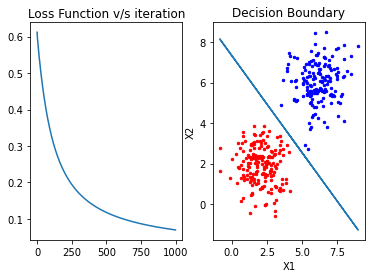

Final weights are:  [-5.888609    0.77058908  0.80218704]


In [188]:
#(a) Plot the decision boundary using the developed logistic regression code

W_f=Linear_LogRegr(m,alpha,X,Y,X1,X2)
print("Final weights are: ",W_f)

In [189]:
# (b) Evaluate the metrics such as Precision, Recall, F1-Score and Accuracy on the test data.

X1 = test_data.iloc[:, 0]
X2= test_data.iloc[:, 1]
True_label= test_data.iloc[:, 2]

X0=np.ones(len(X1))
X=list(zip(X0,X1,X2))

pred_label=[]

# find the predicted label
for i in range(len(X)):
    if sum(W_f*X[i])<0:
        pred_label.append(0)
    else:
        pred_label.append(1)

print("The true labels:       ",True_label)        
print("The predicted labels:  ",pred_label)

The true labels:        0      1
1      1
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    0
149    0
Name: label, Length: 150, dtype: int64
The predicted labels:   [1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0]


In [190]:
CM=Confusion_Matrix(True_label,pred_label)

True positive:   84
True negative:   66
Flase positive:   0
Flase negative:   0


In [191]:
Evaluation_metric(CM[0],CM[1],CM[2],CM[3])

accuracy:   100.0
Recall:  1.0
Precision:  1.0
F1 Score:  1.0
